<a href="https://colab.research.google.com/github/SChintapalli/Kaggle-Projects/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
titanic_train_df= pd.read_csv('/content/drive/MyDrive/Kaggle data sets/Titanic/train.csv')
titanic_test_df= pd.read_csv('/content/drive/MyDrive/Kaggle data sets/Titanic/test.csv')

In [ ]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
titanic_train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
titanic_test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# convert all column name to lower

titanic_train_df.columns = titanic_train_df.columns.str.lower()

In [ ]:
titanic_train_df.columns.values

array(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

# converting 'Sex' values to Numeric values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic_train_df['sex']=le.fit_transform(titanic_train_df['sex'])
#titanic_test_df['sex']=le.fit_transform(titanic_test_df['sex'])

In [ ]:
titanic_train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_train_df.columns.values

array(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'], dtype=object)

Fill the missing value for Age, Cabin and Fare

In [ ]:
titanic_train_df['age'].fillna(titanic_train_df['age'].mean(),inplace=True)
#titanic_test_df['age'].fillna(titanic_test_df['age'].mean(),inplace=True)

titanic_train_df['cabin'].fillna(titanic_train_df['cabin'].fillna("zero"),inplace=True)
#titanic_test_df['cabin'].fillna(titanic_test_df['cabin'].fillna("zero"),inplace=True)

titanic_train_df['fare'].fillna(titanic_train_df['fare'].mean(),inplace=True)
#titanic_test_df['fare'].fillna(titanic_test_df['fare'].mean(),inplace=True)

titanic_train_df.isna().sum()
#titanic_test_df.isna().sum()


,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


## EDA

Text(0, 0.5, 'Counts')

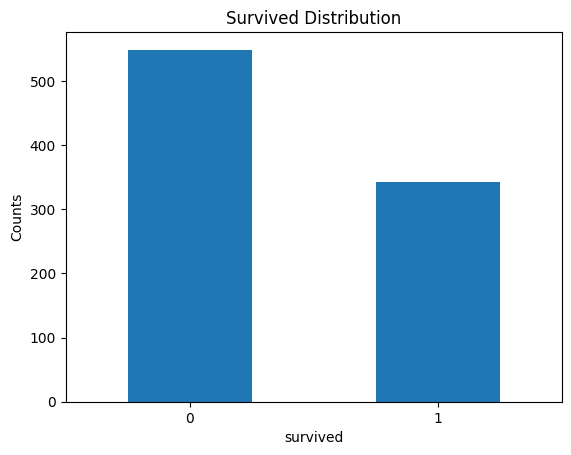

In [ ]:
count_survived = pd.value_counts(titanic_train_df['survived'])  #, sort = True)
count_survived.plot(kind = 'bar', rot=0)
plt.title("Survived Distribution")
plt.xticks(range(2))
plt.xlabel("survived")
plt.ylabel("Counts")

## Feature Engineering

In [ ]:
titanic_train_df['cabin_cat'] = titanic_train_df['cabin'].str.extract(r'([A-Za-z]+)')
titanic_train_df['cabin_num'] = titanic_train_df['cabin'].str.extract(r'(\d+)').astype(float)

titanic_train_df['cabin_cat'] = titanic_train_df['cabin'].str.extract(r'([A-Za-z]+)')
titanic_train_df['cabin_num'] = titanic_train_df['cabin'].str.extract(r'(\d+)').astype(float)

In [ ]:
titanic_train_df.sample(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_cat,cabin_num
584,585,0,3,"Paulner, Mr. Uscher",1,29.699118,0,0,3411,8.7125,zero,C,zero,NaN
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",1,28.000000,1,0,STON/O2. 3101279,15.8500,zero,S,zero,NaN
250,251,0,3,"Reed, Mr. James George",1,29.699118,0,0,362316,7.2500,zero,S,zero,NaN
196,197,0,3,"Mernagh, Mr. Robert",1,29.699118,0,0,368703,7.7500,zero,Q,zero,NaN
693,694,0,3,"Saad, Mr. Khalil",1,25.000000,0,0,2672,7.2250,zero,C,zero,NaN
639,640,0,3,"Thorneycroft, Mr. Percival",1,29.699118,1,0,376564,16.1000,zero,S,zero,NaN
509,510,1,3,"Lang, Mr. Fang",1,26.000000,0,0,1601,56.4958,zero,S,zero,NaN
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",0,45.000000,0,0,347073,7.7500,zero,S,zero,NaN
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",1,28.000000,0,0,345770,9.5000,zero,S,zero,NaN
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",1,21.000000,0,0,8475,8.4333,zero,S,zero,NaN


In [ ]:
titanic_train_df['sibsp'].value_counts()

,count
sibsp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
titanic_train_df['partners'] =  (titanic_train_df['sibsp'] == 1) & (titanic_train_df['parch'] == 0)
titanic_train_df['alone'] = (titanic_train_df['sibsp'] == 0) & (titanic_train_df['parch']  == 0)
titanic_train_df['siblings'] = (titanic_train_df['sibsp'] > 1 ) & (titanic_train_df['parch']  == 0)
titanic_train_df['family'] =  (titanic_train_df['sibsp'] == 1) & (titanic_train_df['parch'] >= 1)

#np.random.seed(42)
titanic_train_df.sample(10)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,cabin_cat,cabin_num,partners,alone,siblings,family
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",0,29.699118,1,0,PC 17611,133.6500,zero,S,zero,NaN,True,False,False,False
143,144,0,3,"Burke, Mr. Jeremiah",1,19.000000,0,0,365222,6.7500,zero,Q,zero,NaN,False,True,False,False
179,180,0,3,"Leonard, Mr. Lionel",1,36.000000,0,0,LINE,0.0000,zero,S,zero,NaN,False,True,False,False
301,302,1,3,"McCoy, Mr. Bernard",1,29.699118,2,0,367226,23.2500,zero,Q,zero,NaN,False,False,True,False
395,396,0,3,"Johansson, Mr. Erik",1,22.000000,0,0,350052,7.7958,zero,S,zero,NaN,False,True,False,False
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",0,50.000000,0,1,PC 17558,247.5208,B58 B60,C,B,58.0,False,False,False,False
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",0,18.000000,0,1,392091,9.3500,zero,S,zero,NaN,False,False,False,False
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",0,43.000000,0,1,24160,211.3375,B3,S,B,3.0,False,False,False,False
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",1,20.000000,0,0,SOTON/O2 3101287,7.9250,zero,S,zero,NaN,False,True,False,False
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",0,49.000000,1,0,PC 17572,76.7292,D33,C,D,33.0,True,False,False,False


In [ ]:
grouped = titanic_train_df.groupby(['partners', 'survived']).size().reset_index(name='count')
grouped

,partners,survived,count
0,False,0,490
1,False,1,278
2,True,0,59
3,True,1,64


In [ ]:
total_per_partner = grouped.groupby('partners')['count'].transform('sum')
total_per_partner

,count
0,768
1,768
2,123
3,123


In [ ]:
grouped['percent'] = (grouped['count'] / total_per_partner) * 100

grouped['percent']

,percent
0,63.802083
1,36.197917
2,47.967480
3,52.032520


In [ ]:
relations_split = ['partners', 'alone', 'siblings', 'family']

for relation in relations_split:
  group= titanic_train_df.groupby([relation,'survived']).size().reset_index(name = 'count')
  total_by_relation = group.groupby(relation)['count'].transform('sum')
  group['percent'] = group['count']/total_by_relation * 100
  print(f"\n----{relation:}----- ")
  print(group)


----partners----- 
   partners  survived  count    percent
0     False         0    490  63.802083
1     False         1    278  36.197917
2      True         0     59  47.967480
3      True         1     64  52.032520

----alone----- 
   alone  survived  count    percent
0  False         0    175  49.435028
1  False         1    179  50.564972
2   True         0    374  69.646182
3   True         1    163  30.353818

----siblings----- 
   siblings  survived  count    percent
0     False         0    537  61.512027
1     False         1    336  38.487973
2      True         0     12  66.666667
3      True         1      6  33.333333

----family----- 
   family  survived  count    percent
0   False         0    511  63.478261
1   False         1    294  36.521739
2    True         0     38  44.186047
3    True         1     48  55.813953


In [ ]:
titanic_train_df['title'] = titanic_train_df['name'].str.extract(r'(Mr|Mrs|Miss|Col|Dona|Dr|Master|Ms|Rev|Capt|Lady|Major|Mlle|Mme|Sir|Jonkheer|Don|the Countess)')
var_mr = ['Sir']
var_mrs = ['Mme']
var_miss = ['Mlle',' Lady','Jonkheer','Ms']
var_royality = ['Rev','Dr','Col','Major','Capt','the Countess','Don']

titanic_train_df['title'] = titanic_train_df['title'].replace(var_mr,'Mr')
titanic_train_df['title'] = titanic_train_df['title'].replace(var_mrs,'Mrs')
titanic_train_df['title'] = titanic_train_df['title'].replace(var_miss,'Miss')
titanic_train_df['title'] = titanic_train_df['title'].replace(var_royality,'Royality')

In [ ]:
titanic_train_df.columns.values

array(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'cabin_cat',
       'cabin_num', 'partners', 'alone', 'siblings', 'family', 'title'],
      dtype=object)

In [ ]:
titanic_train_df = titanic_train_df.drop(['passengerid','sibsp','parch','cabin'], axis = 1)
#titanic_test_df = titanic_test_df.drop(['sibsp','parch','cabin'], axis = 1)
titanic_train_df.columns.values

array(['survived', 'pclass', 'name', 'sex', 'age', 'ticket', 'fare',
       'embarked', 'cabin_cat', 'cabin_num', 'partners', 'alone',
       'siblings', 'family', 'title'], dtype=object)

In [ ]:
### Bins for Age group

In [ ]:
bins= [0,14,21,45,60,100]
labels=['child','teenager','adult','middle-aged','elderly']
titanic_train_df['age-group']= pd.cut(titanic_train_df['age'],bins=bins,labels=labels)
#titanic_test_df['age-group']= pd.cut(titanic_train_df['age'],bins=bins,labels=labels)
titanic_train_df.head(5)

,survived,pclass,name,sex,age,ticket,fare,embarked,cabin_cat,cabin_num,partners,alone,siblings,family,title,age-group
0,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,S,zero,NaN,True,False,False,False,Mr,adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C,C,85.0,True,False,False,False,Mr,adult
2,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,S,zero,NaN,False,True,False,False,Miss,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,S,C,123.0,True,False,False,False,Mr,adult
4,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,S,zero,NaN,False,True,False,False,Mr,adult


In [ ]:
print(titanic_train_df.columns)

Index(['survived', 'pclass', 'name', 'sex', 'age', 'ticket', 'fare',
       'embarked', 'cabin_cat', 'cabin_num', 'partners', 'alone', 'siblings',
       'family', 'title', 'age-group'],
      dtype='object')


In [ ]:
#print(titanic_test_df.columns)

In [ ]:
# Get dummies for new features

In [ ]:
titanic_train_df = pd.get_dummies(titanic_train_df, columns = ['cabin_cat','embarked','age-group','title'])
#titanic_test_df = pd.get_dummies(titanic_test_df, columns = ['Cabin_cat','Embarked','Age-group'])
titanic_train_df.columns.values

array(['survived', 'pclass', 'name', 'sex', 'age', 'ticket', 'fare',
       'cabin_num', 'partners', 'alone', 'siblings', 'family',
       'cabin_cat_A', 'cabin_cat_B', 'cabin_cat_C', 'cabin_cat_D',
       'cabin_cat_E', 'cabin_cat_F', 'cabin_cat_G', 'cabin_cat_T',
       'cabin_cat_zero', 'embarked_C', 'embarked_Q', 'embarked_S',
       'age-group_child', 'age-group_teenager', 'age-group_adult',
       'age-group_middle-aged', 'age-group_elderly', 'title_Lady',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_Royality'], dtype=object)

In [ ]:
titanic_train_df.sample(5)

,survived,pclass,name,sex,age,ticket,fare,cabin_num,partners,alone,...,age-group_teenager,age-group_adult,age-group_middle-aged,age-group_elderly,title_Lady,title_Master,title_Miss,title_Mr,title_Mrs,title_Royality
866,1,2,"Duran y More, Miss. Asuncion",0,27.0,SC/PARIS 2149,13.8583,NaN,True,False,...,False,True,False,False,False,False,True,False,False,False
879,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,11767,83.1583,50.0,False,False,...,False,False,True,False,False,False,False,True,False,False
447,1,1,"Seward, Mr. Frederic Kimber",1,34.0,113794,26.5500,NaN,False,True,...,False,True,False,False,False,False,False,True,False,False
178,0,2,"Hale, Mr. Reginald",1,30.0,250653,13.0000,NaN,False,True,...,False,True,False,False,False,False,False,True,False,False
600,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",0,24.0,243847,27.0000,NaN,False,False,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
feature_set1 = [ 'pclass', 'sex', 'age', 'fare',
       'cabin_num', 'partners', 'alone', 'siblings', 'family',
       'cabin_cat_A', 'cabin_cat_B', 'cabin_cat_C', 'cabin_cat_D',
       'cabin_cat_E', 'cabin_cat_F', 'cabin_cat_G', 'cabin_cat_T',
       'cabin_cat_zero', 'embarked_C', 'embarked_Q', 'embarked_S',
       'age-group_child', 'age-group_teenager', 'age-group_adult',
       'age-group_middle-aged', 'age-group_elderly', 'title_Lady',
       'title_Master', 'title_Miss', 'title_Mr', 'title_Mrs',
       'title_Royality']

In [ ]:
#Random Forest

In [ ]:
y = titanic_train_df['survived']
X= titanic_train_df[feature_set1]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_split=4)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

#Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

Random Forest Accuracy: 0.83
